# CS786 Assignment-2 by Anmol Pabla (190154)

## Q1 Gabor Filter for Squares and Triangles



In image processing, a Gabor filter, is a linear filter used for texture analysis, which essentially means that it analyzes whether there is any specific frequency content in the image in specific directions in a localized region around the point or region of analysis.

Because of the multiplication-convolution property (Convolution theorem), the Fourier transform of a Gabor filter's impulse response is the convolution of the Fourier transform of the harmonic function (sinusoidal function) and the Fourier transform of the Gaussian function.

The Gabor filter can be expressed as:
<center>

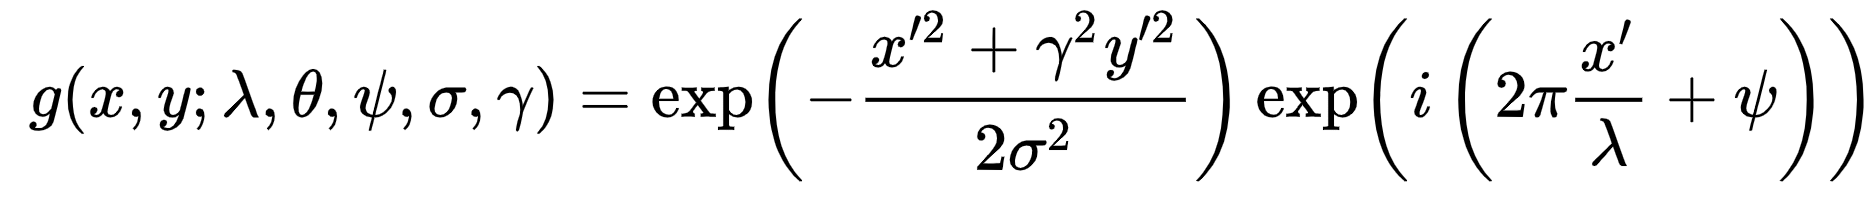
<center>

---

We use the OpenCV library's ***getGaborKernel*** function to obtain the Gabor Filter to be applied. The images for square and triangle used are given below:
<center>

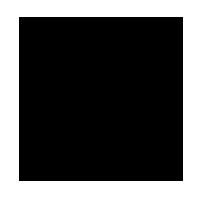     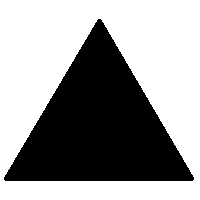
</center>

In [ ]:
# importing necessary files
import numpy as np
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# function to convert grayscale image (img) 
# to binary based on a threshold (thresh)

def cnv2binary(img, thresh):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if(img[i][j]>=thresh): img[i][j]=1
      else : img[i][j]=0
  return img    

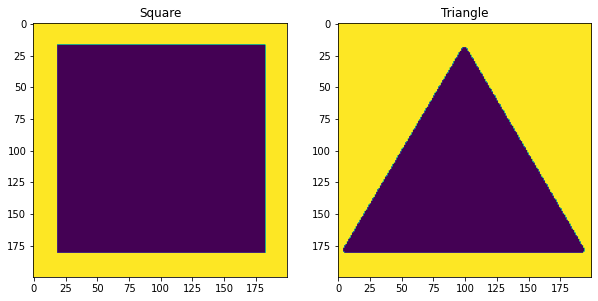

In [ ]:
# Image Pre-Processing
img_sq = cv2.imread('square.png',0)               # Reading image as a grayscale image
img_sq = cnv2binary(img_sq, thresh=127)           # Converting the image to binary

img_tr = cv2.imread('triangle.png',0)             # Reading image as a grayscale image
img_tr = cnv2binary(img_tr, thresh=127)           # Converting the image to binary

# Printing/Plotting the two obtained binary images using matplotlib.imshow()
shapes = plt.figure(figsize=(10,10))
s1 = shapes.add_subplot(121)
s2 = shapes.add_subplot(122)
s1.imshow(img_sq)
s1.set_title('Square')
s2.imshow(img_tr)
s2.set_title('Triangle')
plt.show()



---


We use Gabor filter banks for square and triangle to:


*   Square - Detect Horizontal and Vertical lines, i.e. filters at 0 and 180 degrees
*   Triangle - Detect the two non-horizontal sides, i.e. filters at 60 and 120 degrees

We then multiply the two images obtained by each type of Gabor Bank pixel to pixel, this highlights the overlap of the detections in each case. As one may notice in:


*   Squares - The horizontal and vertical lines detected by square Gabor Bank intersect at vertices thus the overlap is high, whereas for the Triangle Bank the detection for 60 and 120 degress would ideally be 0.
*   Triangles - The 60 and 120 degree lines detected by triangle Gabor Bank intersect at the top vertex thus the overlap is high, whereas for the Square Bank the detection for horizontal line would be the base and vertically would ideally be 0, hence making the product 0.

We use these products to classify the image as a square or triangle. Here it is assumed that the image is a square or a triangle thus the one having the greater product value is given as a result. This could be replaced by a threshold value on the obtained product in case the required functionality is different.


---

In [ ]:
def get_sq_kbank(ksize, sigma, lamda, gamma, phi):
  kbank = []
  # Gabor filters for the horizontal and vertical sides
  kbank.append(cv2.getGaborKernel((ksize,ksize), sigma, 0, lamda, gamma, phi, ktype=cv2.CV_32F)) 
  kbank.append(cv2.getGaborKernel((ksize,ksize), sigma, np.pi/2, lamda, gamma, phi, ktype=cv2.CV_32F)) 
  return kbank

def get_tr_kbank(ksize, sigma, lamda, gamma, phi):
  kbank = []
  # Gabor filters for two non-horizontal sides
  kbank.append(cv2.getGaborKernel((ksize,ksize), sigma, np.pi/6, lamda, gamma, phi, ktype=cv2.CV_32F)) 
  kbank.append(cv2.getGaborKernel((ksize,ksize), sigma, 5*np.pi/6, lamda, gamma, phi, ktype=cv2.CV_32F)) 
  return kbank

def apply_kbank(img, kbank):
  # Applying the gabor kernel bank (kbank) to the image (img) using OpenCV    
  filtered_imgs = []
  for i in range(len(kbank)):
    img_fil = cv2.filter2D(img, cv2.CV_8UC3, kbank[i])
    filtered_imgs.append(img_fil)
  return filtered_imgs  

In [ ]:
# function that flattens an image i.e collapses a 2D array to a list
# [1,2][3,4] goes to [1,2,3,4]
def flatten(img):
  return [item for sublist in img for item in sublist]

# function that plots image, squares, triangles
# squares and triangles contain two images obtained from the 2 kernels in the kernel bank
def plot_figs(image,squares,triangles):
  f = plt.figure(figsize=(20,6))
  fig1 = f.add_subplot(151)
  fig2 = f.add_subplot(152)
  fig3 = f.add_subplot(153)
  fig4 = f.add_subplot(154)
  fig5 = f.add_subplot(155)

  fig1.imshow(image)
  fig1.set_title('Original Image')
  fig2.imshow(squares[0])
  fig2.set_title('Vertical Detection (Square-Bank)')
  fig3.imshow(squares[1])
  fig3.set_title('Horizontal Detection (Square-Bank)')
  fig4.imshow(triangles[0])
  fig4.set_title('60-deg Detection (Triangle-Bank)')
  fig5.imshow(triangles[1])
  fig5.set_title('120-deg Detection (Triangle-Bank)')
  plt.show()


# function to classify images into triangles or squares
def Recognizer(image):
  # Applying Square Gabor Filters (vertical and horizontal sides)
  square_kbank = get_sq_kbank(ksize=20, sigma=5, lamda=2.75, gamma=0.8, phi=0)
  squares = apply_kbank(image,square_kbank)

  # Applying Triangle Gabor Filters (2 non-horizontal sides)
  triangle_kbank = get_tr_kbank(ksize=20, sigma=5, lamda=2.75, gamma=0.8, phi=0)
  triangles = apply_kbank(image,triangle_kbank)
  
  # plotting images
  plot_figs(image,squares,triangles)
  
  # Flattening images and multiplying them to detect corners
  # A Square image would give a high value of sq_img_prod and vice-versa
  sq_img_prod = np.dot(flatten(squares[0]), flatten(squares[1]))
  tr_img_prod = np.dot(flatten(triangles[0]), flatten(triangles[1]))

  print('\nResult of Classification-->')
  # Classifying the image into a triangle or a square based on obtained products
  if(sq_img_prod >= tr_img_prod): 
    print('The given shape is a Square\n\n')
  else: 
    print('The given shape is a Triangle\n\n')

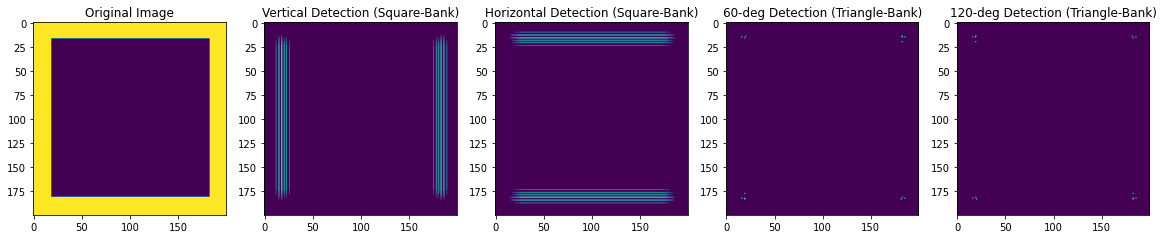


Result of Classification-->
The given shape is a Square




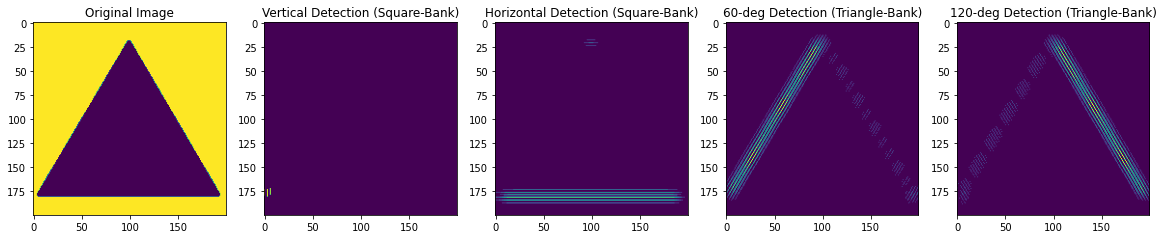


Result of Classification-->
The given shape is a Triangle




In [ ]:
# Recognizing the square and triangle image
Recognizer(img_sq)
Recognizer(img_tr)

## Q2  Simulating the visual search paradigm of Triesman (1980)

The images img_sq and img_tr are binary, we'll first be converting these into RGB images of Red and Blue squares and triangles.

In [ ]:
# Initializing images for storing data as RGB images
img_sq_red = np.zeros((200,200,3))
img_sq_blu = np.zeros((200,200,3))
img_tr_red = np.zeros((200,200,3))
img_tr_blu = np.zeros((200,200,3))

for i in range(200):
  for j in range(200):
    # checking squares
    if(img_sq[i][j]==1): 
      # Putting pixel to white color for background
      img_sq_red[i][j] = [255,255,255]
      img_sq_blu[i][j] = [255,255,255]
    else:
      # Putting pixel to Red or Blue for square 
      img_sq_red[i][j] = [255,0,0]  
      img_sq_blu[i][j] = [0,0,255]  
      
for i in range(200):
  for j in range(200):
    # checking triangles
    if(img_tr[i][j]==1): 
      # Putting pixel to white color for background
      img_tr_red[i][j] = [255,255,255]
      img_tr_blu[i][j] = [255,255,255]
    else:
      # Putting pixel to Red or Blue for square 
      img_tr_red[i][j] = [255,0,0]  
      img_tr_blu[i][j] = [0,0,255]  

In [ ]:
# function to get a plane white image in RGB format
# To be used as the background for making squares and triangles
def get_white_canvas():
  res = np.empty((2000,2000,3))
  for i in range(2000):
    for j in range(2000):
      res[i][j]=[255,255,255]
  return res   

For feature search we place blue squares randomly and then randomly turn one of the blue squares to red, making it the target object.

For conjuction seach we randomly choose positions, at half of these positions we put red triangles and on the other half we put blue squares. Finally we randomly choose one of these positions and convert it to a red square making it the target.

In [ ]:
# red:1 blue:2  ---------  triangle:1 square:2

# function to create image for feature search
def featSearch_Maker(n):
  # choosing n indices randomly
  idx = random.sample(range(100),n)
  # randomly choosing a position to convert to target 
  target = random.choice(idx)
  result = get_white_canvas() 

  # initializing color and shape matrices
  color_mat = np.zeros((10,10))
  shape_mat = np.zeros((10,10))
  for k in idx:
    a = (int)(k/10)
    b = k % 10
    # Placing blue squares at chosen positions
    result[(a*200):(a*200+200),(b*200):(b*200+200),:] = img_sq_blu
    # updating color and shape matrix
    color_mat[a][b] = 2
    shape_mat[a][b] = 2

  a_tar = (int)(target/10)
  b_tar = target % 10
  # turning the randomly chose position to red square
  result[(a_tar*200):(a_tar*200+200),(b_tar*200):(b_tar*200+200)] = img_sq_red
  # updating color and shape matrix
  color_mat[a_tar][b_tar] = 1
  shape_mat[a_tar][b_tar] = 2
  return result, color_mat, shape_mat  

def conjSearch_Maker(n):
  idx = random.sample(range(100),n)
  target = random.choice(idx)
  result = get_white_canvas() 
  color_mat = np.zeros((10,10))
  shape_mat = np.zeros((10,10))
  
  for k in range(0,(int)(len(idx)/2)):
    a = (int)(idx[k]/10)
    b = idx[k] % 10
    # Placing blue squares at chosen positions
    result[(a*200):(a*200+200),(b*200):(b*200+200),:] = img_sq_blu  
    # updating color and shape matrix
    color_mat[a][b] = 2
    shape_mat[a][b] = 2

  for k in range((int)(len(idx)/2), (int)(len(idx))):
    a = (int)(idx[k]/10)
    b = idx[k] % 10
    # Placing red triangles at chosen positions
    result[(a*200):(a*200+200),(b*200):(b*200+200),:] = img_tr_red  
    # updating color and shape matrix
    color_mat[a][b] = 1
    shape_mat[a][b] = 1

  a_tar = (int)(target/10)
  b_tar = target % 10
  # turning the randomly chose position to red
  result[(a_tar*200):(a_tar*200+200),(b_tar*200):(b_tar*200+200)] = img_sq_red
  # updating color and shape matrix
  color_mat[a_tar][b_tar] = 1
  shape_mat[a_tar][b_tar] = 2
  return result, color_mat, shape_mat   


In [ ]:
# Function to call feat Search_Maker and ConjSearch_Maker 
# Based on the arguments passed to the function
# Returns the search image for the experiment
def CreateSearchImage(n,s):
  if n>100 or (s!='F' and s!='C' and s!='f' and s!='c'):
    # returning an error if wrong values enters as input
    print('Please entre F or C and n<=100')
    return 

  # Feature Search
  elif s=='F' or s=='f':
    print('\nThe obtained image is:')
    Search_Image, _ , _ = featSearch_Maker(n)

  # Conjunction Search
  else:
    print('\nThe obtained image is:')
    Search_Image, _ , _ = conjSearch_Maker(n)

  return Search_Image  

Enter Feature(F) or Conjuction Search(C): C
Enter the number of objects (Less than 100): 63

The obtained image is:


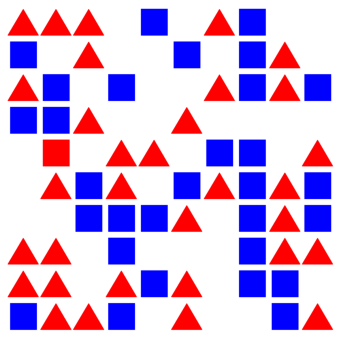

In [ ]:
s = str(input("Enter Feature(F) or Conjuction Search(C): "))
n = int(input("Enter the number of objects (Less than 100): "))
# Taking input from user and passing it CreateSearchImage defined above
search_img = CreateSearchImage(n,s)

# plotting the final image for the experiment
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(search_img.astype(np.uint8))
plt.show()

## Q3 Implementing a simple version of Feature Integration Theory

**Feature Integration Theory-**

>  During a visual search a person uses cues like color, shape, and size to distinguish objects from one another. There are two stages that comprise this theory.

> The first is the pre-attention stage in which the individual focuses on one distinguishing attribute of the object. The pre-attention phase is an automatic process which happens unconsciously. The second stage is focused attention in which an individual takes all of the observed features and combines them to make a complete perception. This second stage process occurs if the object doesn't stand out immediately.

The feature integration theory causes time for conjunction search to increase with set size whereas that of fearture search to almost remain a constant.


---


In the implmentation below, the color and shape data is obtained from *featSearch_Maker* and *conjSearch_Maker*, this is assumed to be available automatically and hence doesn't contribute to reaction time. Integration of features is assumed to take a time of 0.1 seconds and time taken for making a decision (recognizing the target) after obtaining data is 0.25 secs.

In [ ]:
# function to obtain time for feature search
def get_feat_times(obj_initial, obj_final):
  react_times_feat = []
  # running loop to check for set sizes from obj_initial to obj_final
  for n in range(obj_initial, obj_final+1):
    react_time = 0
    # obtaining search image and shape and color data (automatically available)
    Search_Image, cmap , smap = featSearch_Maker(n)
    count_red = 0
    count_blu = 0
    count_sq = 0
    count_tr = 0

    # Counting the no. of red, blue and triangle, square features
    # For feature search target differs in only one feature from all distractors
    for i in range(10):
      for j in range(10):
        if cmap[i][j]==1:
          count_red+=1
        else: count_blu+=1

        if cmap[i][j]==1:
          count_tr+=1
        else: count_sq+=1

    # The feature that has only one occurence is the target
    if(count_red==1 or count_blu==1 or count_tr==1 or count_sq==1): 
      # adding time needed to make the decision
      react_time += 0.25  
      
    # adding current reaction time to list of react times  
    react_times_feat.append(react_time)
  return react_times_feat

In [ ]:
# function to obtain time for conjunction search
def get_conj_times(obj_initial, obj_final):
  react_times_conj = []
  # running loop to check for set sizes from obj_initial to obj_final
  for n in range(obj_initial, obj_final+1):
    react_time = 0
    # obtaining search image and shape and color data (automatically available)
    Search_Image, cmap , smap = conjSearch_Maker(n)
    count_rt = 0
    count_bt = 0
    count_rs = 0
    count_bs = 0

    # Counting the red-triangle, blue-triangle, red-square, blue-square features
    # For Conjuction search feature integration is needed to identify target    
    for k in range(100):
      i = int(k/10)
      j = int(k%10)
      # Incrementing value based on features found and 
      # adding a time of 0.1 needed for feature integration
      if(cmap[i][j]==1 and smap[i][j]==1):
        count_rt+=1
        react_time+=0.1 
      elif(cmap[i][j]==1 and smap[i][j]==2):
        count_rs+=1
        react_time+=0.1 
      elif(cmap[i][j]==2 and smap[i][j]==1):
        count_bt+=1
        react_time+=0.1 
      elif(cmap[i][j]==2 and smap[i][j]==2):
        count_bs+=1
        react_time+=0.1 
    
    # The combination of features that has only one occurence is the target
    if(count_rt==1 or count_bt==1 or count_rs==1 or count_bs==1):
      # adding time needed to make the decision 
      react_time += 0.25  

    # adding current reaction time to list of react times    
    react_times_conj.append(react_time)
  return react_times_conj

In [ ]:
# variation plotted for variation of set size from obj_initial to obj_final
obj_initial = 2
obj_final = 100

# getting react_times and the list of set size
react_times_conj = get_conj_times(obj_initial, obj_final)
react_times_feat = get_feat_times(obj_initial, obj_final)
set_sizes = range(obj_initial, obj_final+1)

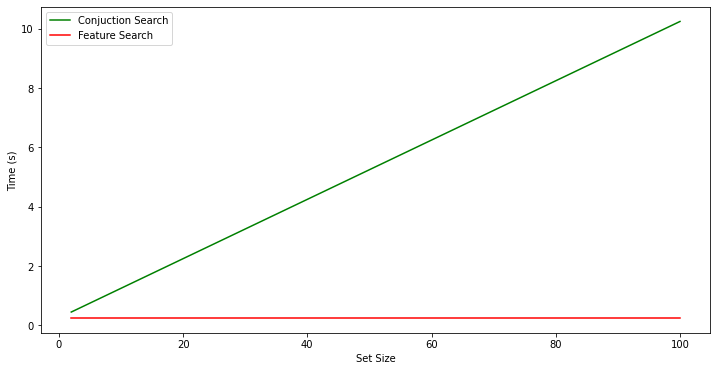

In [ ]:
# Plotting the variation of Reaction time in Feature Search and Conjunction
# Search with increasing set size
plt.figure(figsize=(12,6))
plt.plot(set_sizes,react_times_conj, label='Conjuction Search', color='g')
plt.plot(set_sizes,react_times_feat, label='Feature Search', color='r')
plt.xlabel('Set Size')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

We find that the time for conjuction search increases with set size whereas the time for feature search remains constant, this is what one expects from the feature integration theory.

---

